# 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np     # mathematical calculation
import seaborn as sns  # visualization
import matplotlib.pyplot as plt # plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
path = 'd:/Python/Loan_Prediction/'
#path = 'c:/Users/Dell/Documents/Python Scripts/'
os.chdir(path) 
os.getcwd()

'd:\\Python\\Loan_Prediction'

# 2. Reading Data

In [3]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [4]:
len(train), len(test)

(614, 367)

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

# 3. Anivariate Analysis

It is the simplest form of analyzing data where we examine each variable 
individually. 
For categorical features we can use frequency table or bar plots
which will calculate the number of each category in a particular variable. 
For numerical features, probability density plots can be used to look at the 
distribution of the variable.

# 3.1 Target variable

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


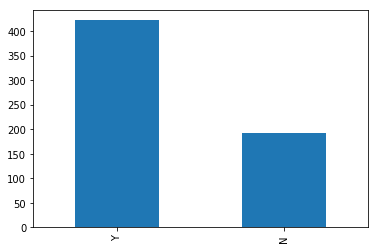

In [13]:
train['Loan_Status'].value_counts().plot.bar()

# 3.2 Independent Variable (Categorical) - Frequency table

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

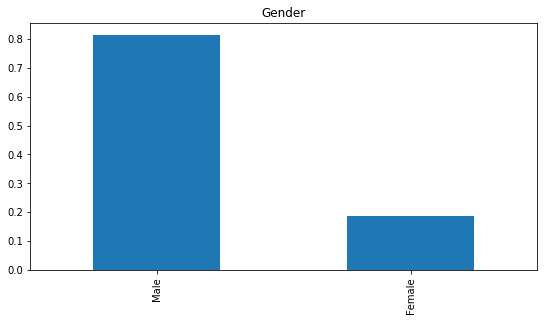

In [14]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10), title='Gender')

<Figure size 432x288 with 0 Axes>

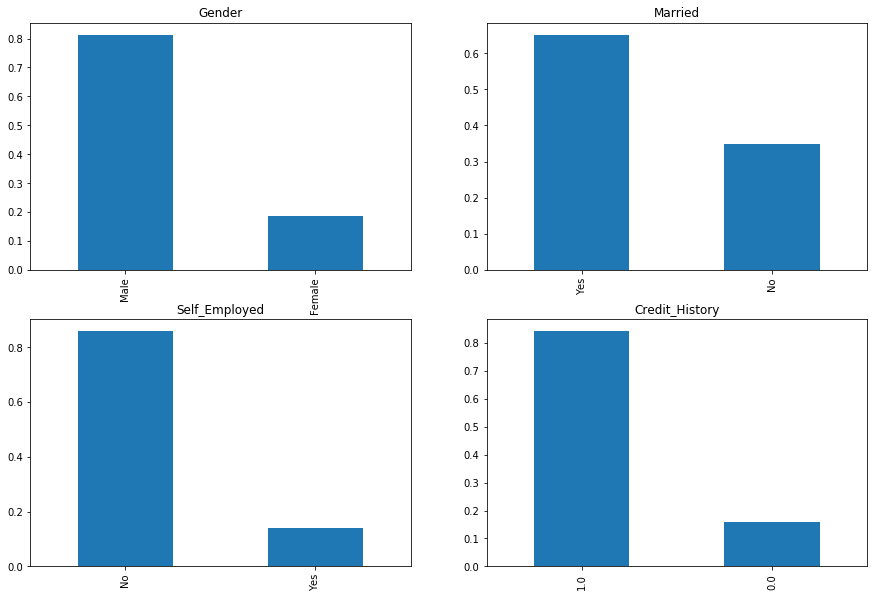

In [15]:
plt.figure(1) 
plt.figure(figsize=(15,10)) 
# subplot(nrows, ncols, index)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender') 

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title='Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

# 3.3 Independent Variable (Ordinal) - Frequency table 

Ordinal features: Variables in categorical features having some order involved 
    (Dependents, Education, Property_Area)

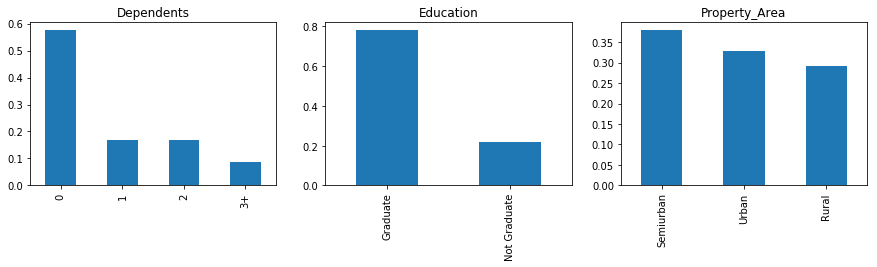

In [16]:
plt. figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize =(15,3), title ='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

# 3.4 Independent Variable (Numerical) -Distribution

Numerical features: These features have numerical values 
(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

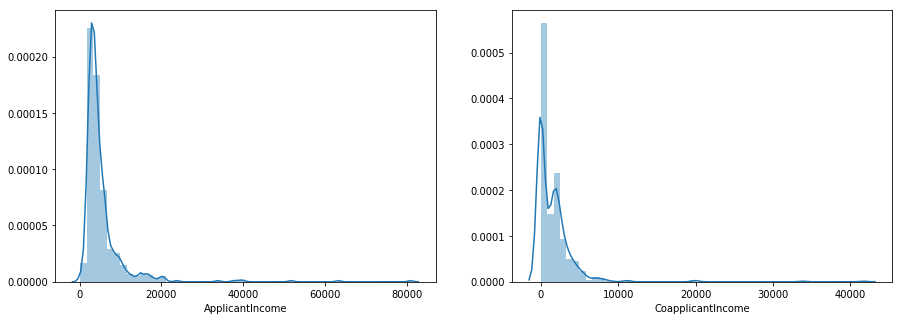

In [17]:
plt.figure(1,figsize=(15,5))
# first import matplotlib and use it to set the size of the figure
#plt.figure(figsize=(15,5)) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
sns.distplot(train['CoapplicantIncome'])
plt.show()

The distribution of applicant income is towards left: 
  - which means it is not normally distributed. 
  - We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

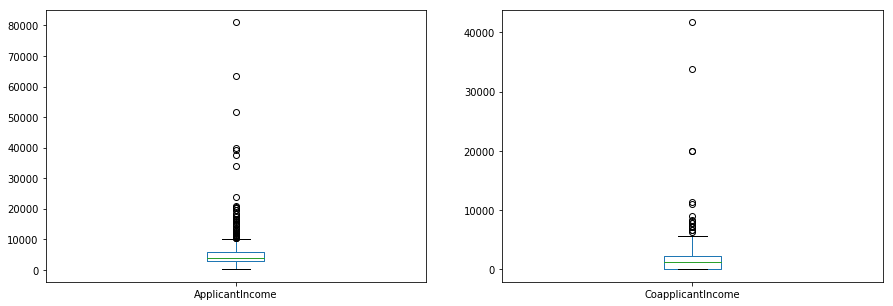

In [18]:
plt.figure(1, figsize = (15,5))
plt.subplot(121)
train['ApplicantIncome'].plot.box()

plt.subplot(122)
train['CoapplicantIncome'].plot.box()

From boxplot can be seen the presence of a lot of outliers/extreme values. 
Perhaps this is due to a different level of education.

Text(0.5, 0.98, '')

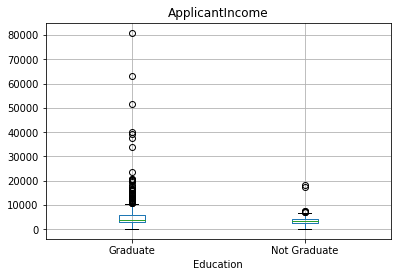

In [19]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

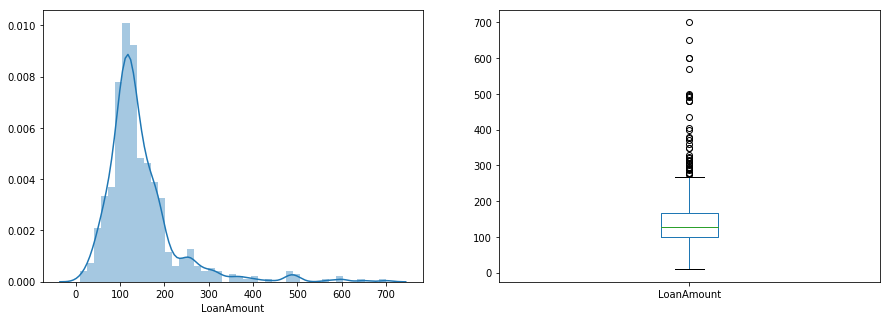

In [20]:
plt.figure(1, figsize = (15,5))

plt.subplot(121)
df = train['LoanAmount'].dropna()
sns.distplot(df)

plt.subplot(122)
df.plot.box()


In [21]:
len(df)

592

# 4. Bivariate Analysis

# 4.1 Categorical Independent Variable vs Target Variable

Stacked bar plot now which will give us the proportion of approved and unapproved loans.

# 4.1.1 Gender - Loan_Status

In [22]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.head()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [23]:
Gender.sum()

Loan_Status
N    187
Y    414
dtype: int64

In [24]:
Gender.count()

Loan_Status
N    2
Y    2
dtype: int64

In [25]:
Gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

In [26]:
Gender.div(Gender.sum())

Loan_Status,N,Y
Gender,,
Female,0.197861,0.181159
Male,0.802139,0.818841


In [27]:
Gender.div(Gender.sum().astype(float))

Loan_Status,N,Y
Gender,,
Female,0.197861,0.181159
Male,0.802139,0.818841


In [28]:
Gender.div(Gender.sum(1).astype(float),axis =0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


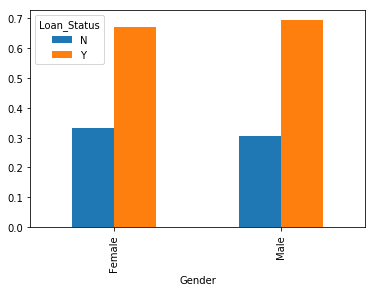

In [29]:
Gender.div(Gender.sum(1).astype(float),axis =0).plot.bar()

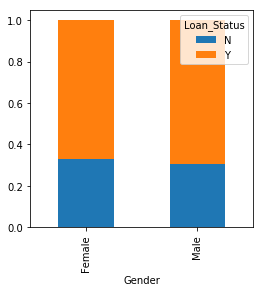

In [30]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True, figsize =(4,4))

Female parameter: 
    - total      = 112 (100%)
    - approved   =  75 ( 67%)
    - unapproved =  37 ( 33%)
Male parameter: 
    - total      = 489 (100%)
    - approved   = 339 ( 70%)
    - unapproved = 150 ( 30%)


Approved parameter: 
    - total      = 414 (100%)
    - Female     =  75 ( 18%)
    - Male       = 339 ( 82%)
Unapproved parameter: 
    - total      = 187 (100%)
    - Female     =  37 ( 20%)
    - Male       = 150 ( 80%)
    

# 4.1.2 Married, Dependents, Education, Self_Employed - Loan_Status

In [31]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

In [32]:
Married.head()

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [33]:
Dependents.head()

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [34]:
Education.head()

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [35]:
Self_Employed.head()

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [36]:
Married.div(Married.sum())

Loan_Status,N,Y
Married,,
No,0.411458,0.319809
Yes,0.588542,0.680191


In [37]:
Married.div(Married.sum(1).astype(float), axis =0)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


In [38]:
Married.div(Married.sum().astype(float), axis =1)

Loan_Status,N,Y
Married,,
No,0.411458,0.319809
Yes,0.588542,0.680191


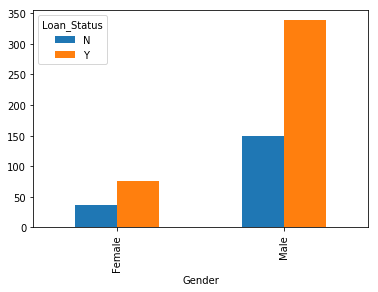

In [39]:
Gender.plot.bar()

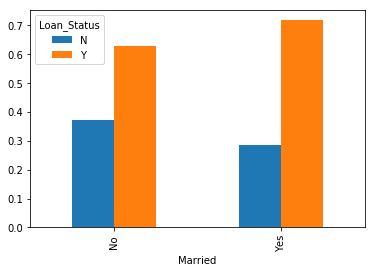

In [40]:
Married.div(Married.sum(1), axis=0).plot.bar()

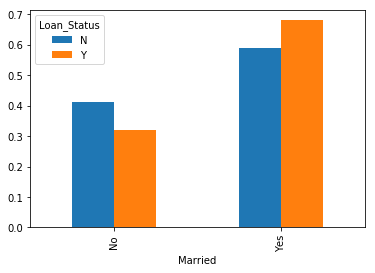

In [41]:
Married.div(Married.sum(), axis=1).plot.bar()

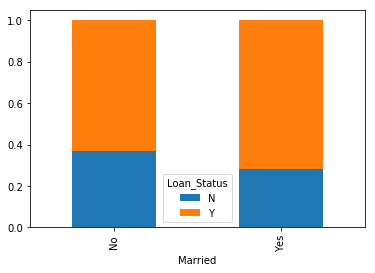

In [42]:
Married.div(Married.sum(1), axis=0).plot(kind="bar", stacked = True)

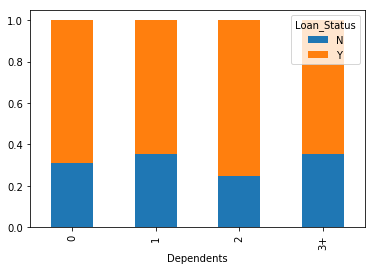

In [43]:
Dependents.div(Dependents.sum(1), axis=0).plot(kind="bar", stacked = True)

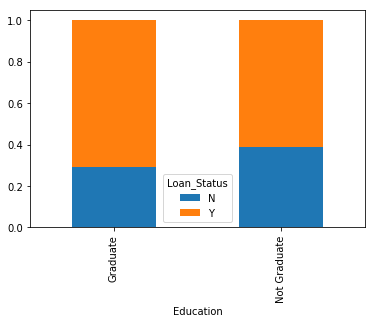

In [44]:
Education.div(Education.sum(1), axis=0).plot(kind="bar", stacked = True)

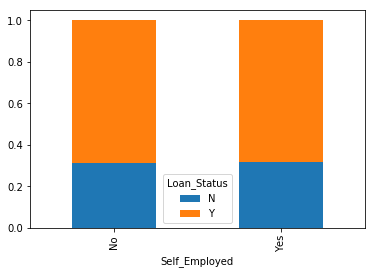

In [45]:
Self_Employed.div(Self_Employed.sum(1), axis=0).plot(kind="bar", stacked = True)

# 4.1.3 Married, Dependents, Education, Self_Employed - Loan_Status

In [46]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

In [47]:
Credit_History.div(Credit_History.sum())

Loan_Status,N,Y
Credit_History,,
0.0,0.458101,0.018182
1.0,0.541899,0.981818


In [48]:
Credit_History.div(Credit_History.sum(1), axis =0)

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


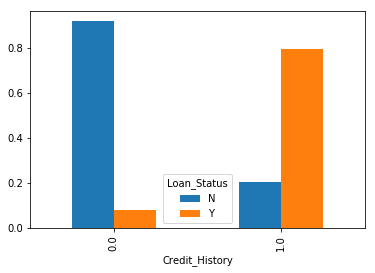

In [49]:
Credit_History.div(Credit_History.sum(1), axis = 0).plot(kind = "bar")

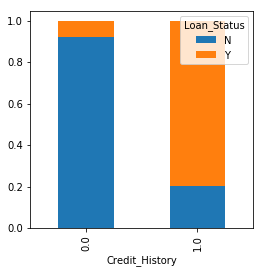

In [50]:
Credit_History.div(Credit_History.sum(1), axis = 0).plot(kind = "bar", stacked =True, figsize = (4,4))

In [51]:
Property_Area.div(Property_Area.sum())

Loan_Status,N,Y
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


In [52]:
Property_Area.div(Property_Area.sum(1), axis = 0)

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


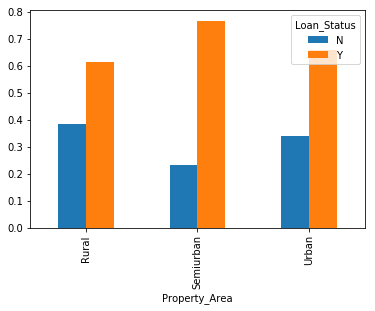

In [53]:
Property_Area.div(Property_Area.sum(1), axis = 0).plot(kind = 'bar')

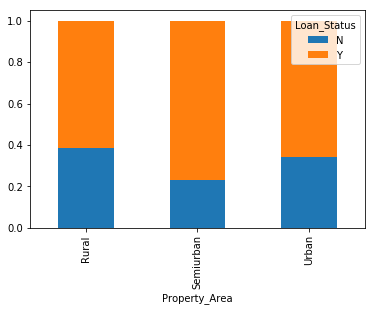

In [54]:
Property_Area.div(Property_Area.sum(1), axis = 0).plot(kind = 'bar', stacked = True)

# 4.2 Numerical Independent Variable vs Target Variable

Mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [55]:
train.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


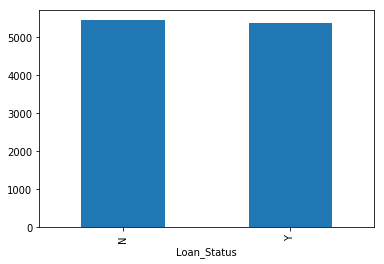

In [56]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [57]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
bins =[0, 2500, 4000, 6000, 81000]
group =['Low', 'Average', 'High', 'Very high']
train['Income_bins'] = pd.cut(train['ApplicantIncome'], bins, labels =group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [59]:
Income_bin = pd.crosstab(train['Income_bins'], train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bins,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


In [60]:
Income_bin.div(Income_bin.sum(), axis =1)

Loan_Status,N,Y
Income_bins,,
Low,0.177083,0.175355
Average,0.348958,0.376777
High,0.234375,0.232227
Very high,0.239583,0.215640


In [61]:
Income_bin.div(Income_bin.sum(1), axis = 0)

Loan_Status,N,Y
Income_bins,,
Low,0.314815,0.685185
Average,0.296460,0.703540
High,0.314685,0.685315
Very high,0.335766,0.664234


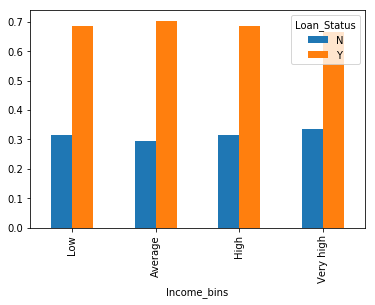

In [62]:
Income_bin.div(Income_bin.sum(1), axis = 0).plot(kind ='bar')

Text(0, 0.5, 'Percentage')

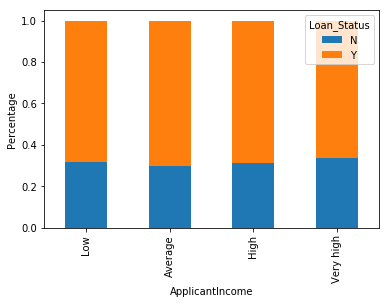

In [63]:
Income_bin.div(Income_bin.sum(1), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Applicant income does not affect the chances of loan approval.This contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

Let's analyze the coapplicant income:

In [64]:
bins =[0, 2500, 4000, 6000, 81000]
#group =['Low', 'Average', 'High', 'Very high']
train['Coapplicant_Income_bins'] = pd.cut(train['CoapplicantIncome'], bins, labels =group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


Where CoapplicantIncome = 0 there Coapplicant_Income_bins = 'NaN'-> problematic
We have top make one more bin
from (-1 to    0) = No 
from ( 1 to 2500) = Low

In [65]:
bins_new =[-1,1, 2500, 4000, 6000, 81000]
group_new =['No','Low', 'Average', 'High', 'Very high']
train['Coapplicant_Income_bins'] = pd.cut(train['CoapplicantIncome'], bins_new, labels =group_new)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No


In [66]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bins'], train['Loan_Status'])
Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bins,,
No,96,177
Low,53,161
Average,24,48
High,11,26
Very high,8,10


In [67]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum())

Loan_Status,N,Y
Coapplicant_Income_bins,,
No,0.500000,0.419431
Low,0.276042,0.381517
Average,0.125000,0.113744
High,0.057292,0.061611
Very high,0.041667,0.023697


In [68]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1), axis = 0)

Loan_Status,N,Y
Coapplicant_Income_bins,,
No,0.351648,0.648352
Low,0.247664,0.752336
Average,0.333333,0.666667
High,0.297297,0.702703
Very high,0.444444,0.555556


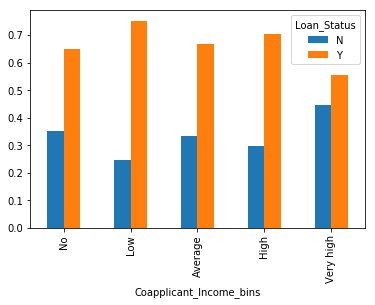

In [69]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1), axis = 0).plot(kind ='bar')

Text(0, 0.5, 'Percentage')

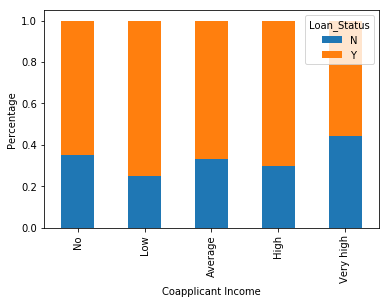

In [70]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')

Make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [71]:
train['Total_Income'] = train['CoapplicantIncome'] + train['ApplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0


In [72]:
#bins =[0, 2500, 4000, 6000, 81000]
#group =['Low', 'Average', 'High', 'Very high']
train['Total_Income_bins'] = pd.cut(train['Total_Income'], bins, labels = group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0,High


In [73]:
Total_Income_bin = pd.crosstab(train['Total_Income_bins'], train['Loan_Status'])
Total_Income_bin

Loan_Status,N,Y
Total_Income_bins,,
Low,14,10
Average,32,87
High,65,159
Very high,81,166


In [74]:
Total_Income_bin.div(Total_Income_bin.sum())

Loan_Status,N,Y
Total_Income_bins,,
Low,0.072917,0.023697
Average,0.166667,0.206161
High,0.338542,0.376777
Very high,0.421875,0.393365


In [75]:
Total_Income_bin.div(Total_Income_bin.sum(1), axis =0)

Loan_Status,N,Y
Total_Income_bins,,
Low,0.583333,0.416667
Average,0.268908,0.731092
High,0.290179,0.709821
Very high,0.327935,0.672065


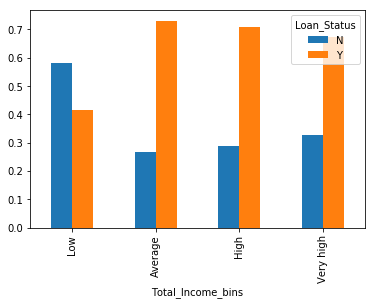

In [76]:
Total_Income_bin.div(Total_Income_bin.sum(1), axis =0).plot.bar()

Text(0, 0.5, 'Percentage')

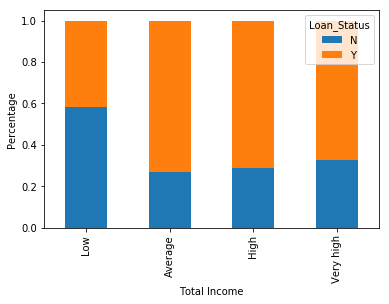

In [77]:
Total_Income_bin.div(Total_Income_bin.sum(1), axis =0).plot(kind = 'bar', stacked =True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Applicants with Low income have two time higher rejection level than other with Higher income

# 4.2.1 Let’s visualize the Loan amount variable.

In [78]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [79]:
bins = [0, 100, 200, 700]
group = ['Low','Average','High',]
train['Loan_Amount_bins'] = pd.cut(train['LoanAmount'], bins, labels = group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0,High,Average


In [80]:
Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bins'], train['Loan_Status'])
Loan_Amount_bin

Loan_Status,N,Y
Loan_Amount_bins,,
Low,47,107
Average,103,255
High,31,49


In [81]:
Loan_Amount_bin.div(Loan_Amount_bin.sum())

Loan_Status,N,Y
Loan_Amount_bins,,
Low,0.259669,0.260341
Average,0.569061,0.620438
High,0.171271,0.119221


In [82]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(1), axis = 0)

Loan_Status,N,Y
Loan_Amount_bins,,
Low,0.305195,0.694805
Average,0.287709,0.712291
High,0.387500,0.612500


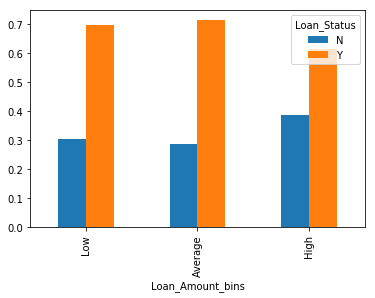

In [83]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(1), axis =0).plot(kind = 'bar')

Text(0, 0.5, 'Percentage')

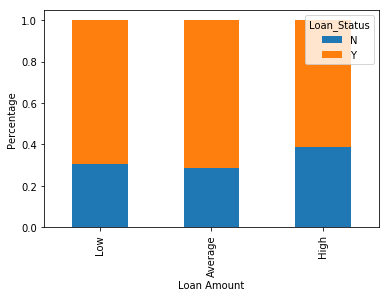

In [84]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(1), axis =0).plot(kind = 'bar', stacked =True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

Applicants how asked for higher loan amout have higher rejection level than other with lower loan amount

In [85]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0,High,Average


In [86]:
train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [87]:
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [88]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# 4.2.2 Let’s visualize correlation between all the numerical variables

In [89]:
#train_new = train.copy()

In [115]:
Correlation_Matrix = train.corr()
Correlation_Matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678,-0.015109
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,-0.031271
Total_Income,0.893037,0.342781,0.624621,-0.069948,-0.015109,-0.031271,1.000000


In [99]:
Correlation_Matrix.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.381220,0.225477,0.402527,0.144297,0.160193,0.462564
std,0.503457,0.415986,0.395253,0.421226,0.411473,0.453100
min,-0.116605,-0.116605,-0.008433,-0.069948,-0.015109,-0.069948
25%,-0.037658,-0.045423,0.076740,-0.056235,-0.013144,0.074364
50%,0.278097,0.093282,0.379764,-0.021918,-0.005245,0.483701
75%,0.812505,0.304240,0.611193,0.029953,0.000589,0.825933
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


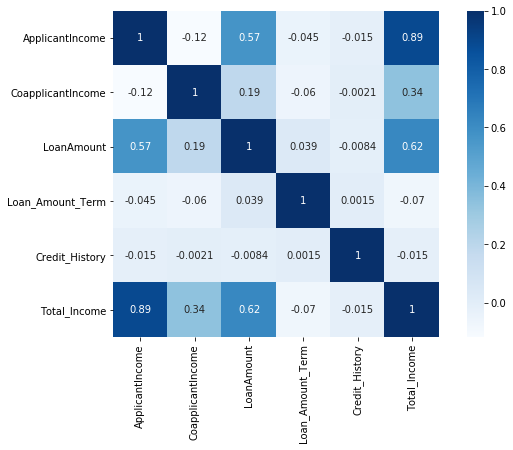

In [105]:
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'Blues', annot=True)

In [113]:
train_new = train.copy()
train['Dependents'].replace('3+',3, inplace = True)
test['Dependents'].replace('3+',3, inplace = True)
train['Loan_Status'].replace('N',0, inplace = True)
train['Loan_Status'].replace('Y',1, inplace = True)

In [109]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678,-0.015109
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,-0.031271
Total_Income,0.893037,0.342781,0.624621,-0.069948,-0.015109,-0.031271,1.000000


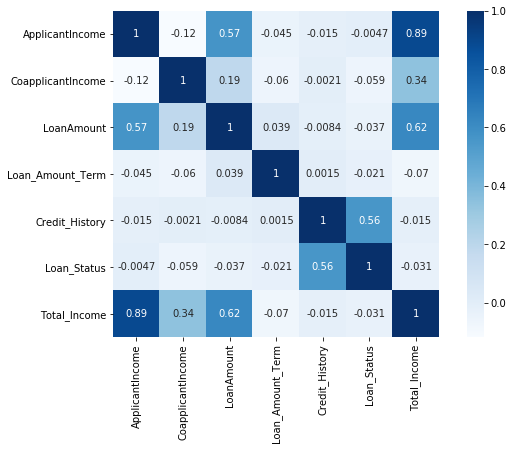

In [116]:
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'Blues', annot=True)

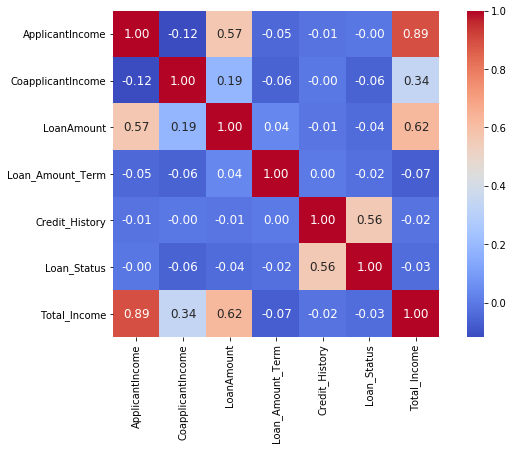

In [137]:
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'coolwarm', annot=True, fmt=".2f", annot_kws={'size':12})

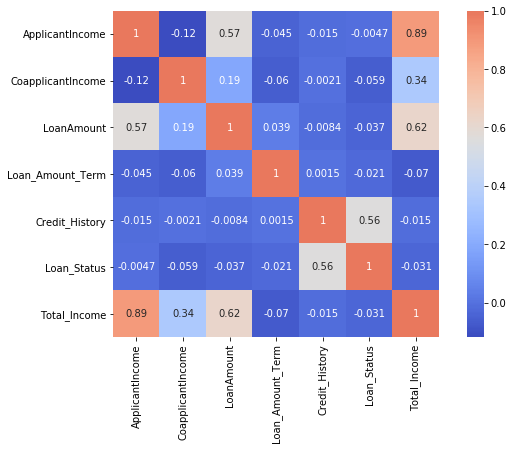

In [127]:
midpoint = (Correlation_Matrix.values.max()- Correlation_Matrix.values.min())/2
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'coolwarm', annot=True, center = midpoint, robust=True)

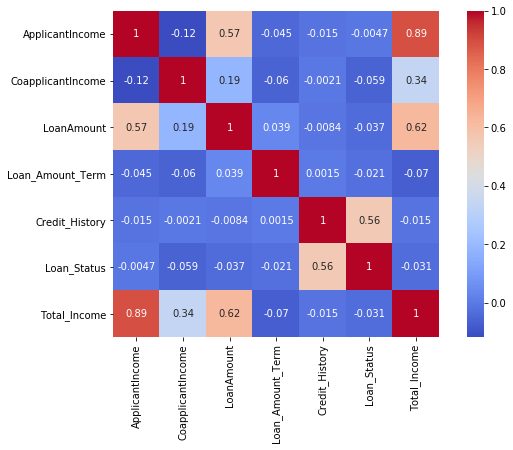

In [130]:
midpoint = (Correlation_Matrix.values.max()- Correlation_Matrix.values.min())/2
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'coolwarm', annot=True, robust=True)

In [111]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,No,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,No,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,No,6000.0,High,Average


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
Loan_ID                    614 non-null object
Gender                     601 non-null object
Married                    611 non-null object
Dependents                 599 non-null object
Education                  614 non-null object
Self_Employed              582 non-null object
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 592 non-null float64
Loan_Amount_Term           600 non-null float64
Credit_History             564 non-null float64
Property_Area              614 non-null object
Loan_Status                614 non-null int64
Income_bins                614 non-null category
Coapplicant_Income_bins    614 non-null category
Total_Income               614 non-null float64
Total_Income_bins          614 non-null category
Loan_Amount_bins           592 non-null category
dtypes: category(4), float64(5), int64